In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.feature import hog
from skimage import data
from PIL import Image

# Histogram of oriented gradients

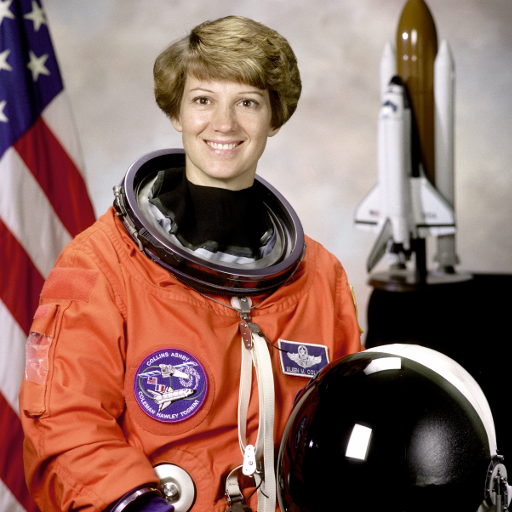

In [93]:
img = data.astronaut()
Image.fromarray(img)

# Calculating Gradients

## X-Axis Convolution

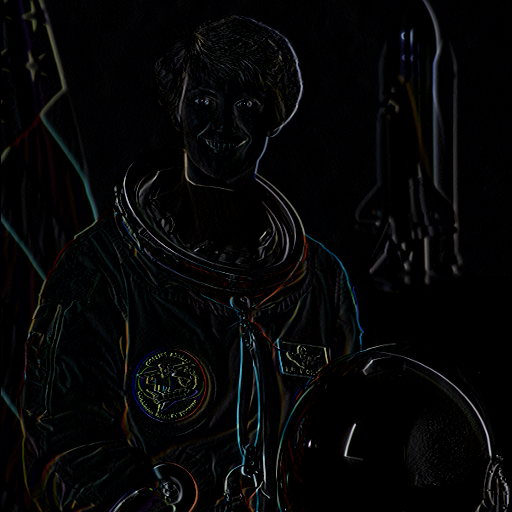

In [95]:
x_grad = cv2.filter2D(img, cv2.CV_8U, np.array([[-1, 0, 1]]))
Image.fromarray(x_grad)

## Y-Axis Convolution

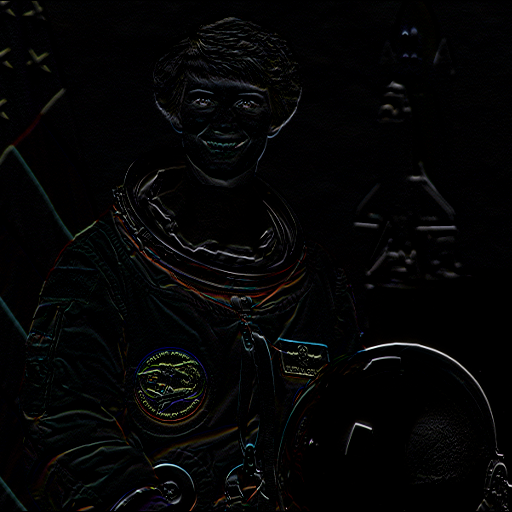

In [97]:
y_grad = cv2.filter2D(img, cv2.CV_8U, np.array([-1, 0, 1]))
Image.fromarray(y_grad)

## Magnitude and Angle

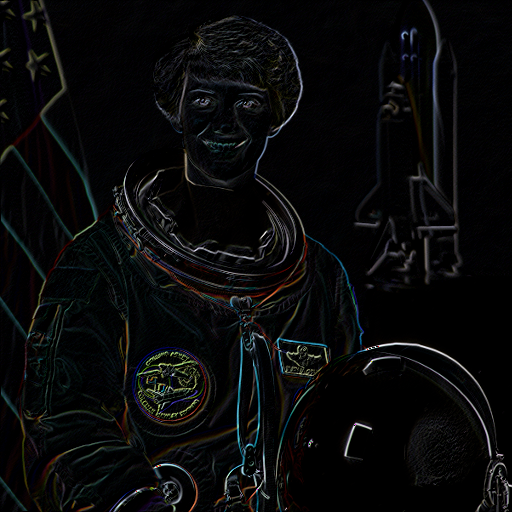

In [102]:
mag, angle = cv2.cartToPolar(x_grad.astype(np.float32), 
                             y_grad.astype(np.float32), 
                             angleInDegrees=True)
magnitude = mag.astype(np.uint8)
Image.fromarray(magnitude)

# Calculate HoG

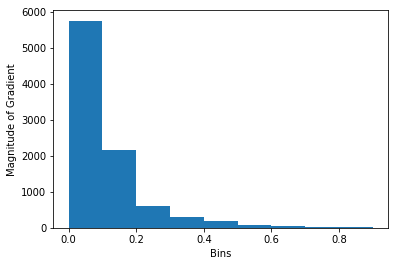

In [148]:
image = cv2.cvtColor(data.astronaut(), cv2.COLOR_RGB2GRAY)
histogram, hog_image = hog(image, 
                           orientations=9, 
                           pixels_per_cell=(16, 16),
                           cells_per_block=(1, 1), 
                           visualise=True)

plt.hist(histogram, np.arange(0.0, 1, 0.1))
plt.xlabel("Bins")
plt.ylabel("Magnitude of Gradient")
plt.show()

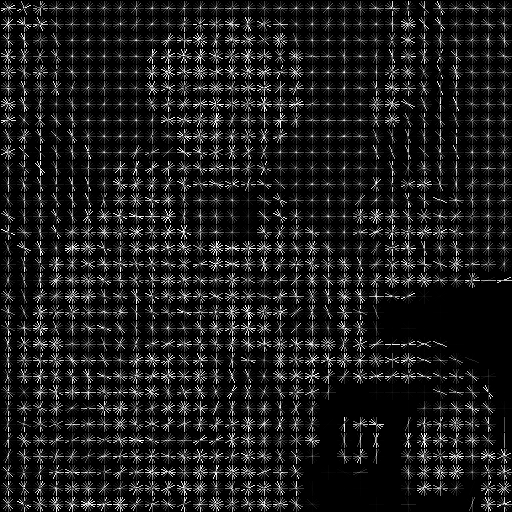

In [58]:
Image.fromarray(hog_image)

# People Detection

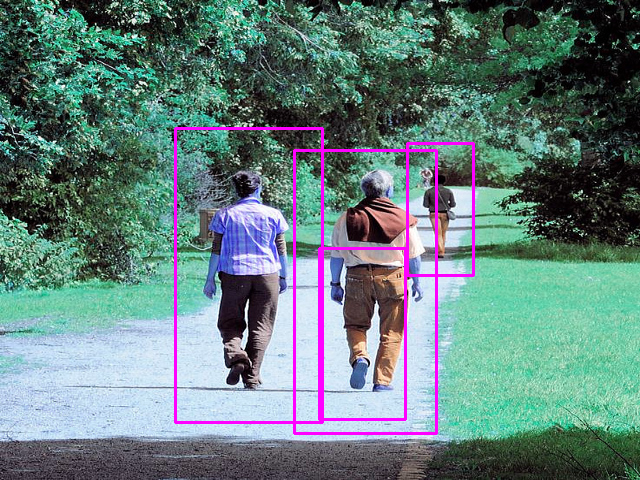

In [186]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


example = cv2.resize(cv2.imread("people.jpg", 1), (640, 480))
(rects, weights) = hog.detectMultiScale(example, 
                                        winStride=(8, 8), # Step-Size
                                        padding=(4, 4), # Padding of Sliding Window
                                        scale=1.05)

vis = example.copy()
for rect in rects:
    x, y, x2, y2, = rect
    cv2.rectangle(vis, (x, y), (x+x2, y+y2), (255, 0, 255), 2)
    
Image.fromarray(vis)